Consider the case where some discrete random variable $X$ can be described by a PMF $f$ and CDF $F$, where $F(x) = \sum_{0}^{x}f(x)$. Recall that $\forall x \in X, 0 \leq f(x) \leq 1, 0 \leq F(x) \leq 1$. Also, recall that for $x_{max} = max(X), F(x_{max}) = 1$.

Most programming languages allow you to generate a random uniform number in the range 0 to 1 inclusive. Since probabilities lie within the range 0 to 1 inclusive, this is equivalent to generating a probability. Recall that $F: X \rightarrow \mathbb{R}$. Hence, $F^{-1}: \mathbb{R} \rightarrow X$. However, the inverse of $F$ might not be easy to find or might not exist in a closed, analytical form for discrete random variables (NB: this is not always the case, and such cases, we can use the inverse [as will be seen later]). Consequently, we can use an algorithmic procedure to find, given a probability, a corresponding value for $x \in X$.

By the definition of $F$, we can set-up "fences" for different values of $x$. If the probability we generate is within a particular $x$'s fence, then we say that $x$ was the appropriate inverse. Consider $X \sim \text{Bin}(10, 0.4)$ and that we randomly generate a probability of 0.19. 

In [3]:
# import statements
%pylab inline
import numpy # for uniform sampling
from scipy import special as misc # for combinations, i.e. n choose k, function
from scipy import interpolate # to make plots smooth

def binomialf1(x):
    """
    Computes probability of x successes in a binomial distributed random variable 
    for 10 trials with probability of success being 0.4
    @param x: the number of successes
    """
    n = 10
    p = 0.4
    num_combs = misc.comb(n, x)
    prob = (p ** x) * ((1 - p) ** (n - x)) 
    return num_combs * prob

Populating the interactive namespace from numpy and matplotlib


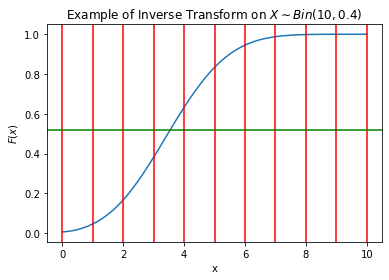

In [5]:
# Get values, stored as numpy arrays for consistency 
x = numpy.array(list(range(0, 11)))
f_x_vals = numpy.array(list(map(binomialf1, x)))
F_x_vals = (numpy.cumsum(f_x_vals))
f = interpolate.interp1d(x, F_x_vals, kind='cubic')

# Create smoothed versions for a nicer plot
x_prime = numpy.linspace(0, 10, num=100, endpoint=True)
y_prime = f(x_prime)

# plot the smoothed values
plt.plot(x_prime, y_prime)
plt.ylabel('$F(x)$')
plt.xlabel('x')
plt.title('Example of Inverse Transform on $X \sim Bin(10, 0.4)$')

# draw vertical lines for "fences"
for i in x:
    plt.axvline(x=i, color='red', ls='-')
    
plt.axhline(y=numpy.random.uniform(), color='green') # get random proabbility

plt.show()

In the above plot, the sample of $X$ is the $x$ value corresponding to the red line right after the point where the blue curve of the CDF $F$ and the green line of the randomly choosen probability intersect.

In [6]:


def inverse_transform_sampling(f, x_min=1):
    """
    @param f: a function that gives us the probability of some x
    @param x_min: miniumum value that x can take
    """
    u = numpy.random.uniform(0, 1) # sample from uniform distribution in [0, 1]
    x_curr = x_min
    x_val = None 
    p_curr = 0
    while True: # if x_max is None, we enter an infinite loop until we break out
        p_curr += f(x_curr)
        if p_curr >= u:
            x_val = x_curr
            break
        x_curr += 1
    return x_val 


    
    

In [24]:
sample = inverse_transform_sampling(binomialf1)
print('First random sample is ', sample)

First random sample is  4


In [25]:
for i in range(0, 11):
    print(i, '  --- ', binomialf1(i))

0   ---  0.006046617599999997
1   ---  0.04031078399999999
2   ---  0.12093235199999997
3   ---  0.21499084799999998
4   ---  0.250822656
5   ---  0.2006581248
6   ---  0.11147673600000005
7   ---  0.04246732800000001
8   ---  0.010616832000000005
9   ---  0.0015728640000000009
10   ---  0.00010485760000000006
